<img src="imgs/logo.png" width="95%">

---------------
Part of [ACM SIGCHI Summer School on Computational Interaction](http://computationalinteraction.org)

# Day 2: Practical Combinatorial Optimization: Layout Design as Example

#### <b>[Antti Oulasvirta](http://users.comnet.aalto.fi/oulasvir/)</b> / Aalto University

*Combinatorial optimization refers to algorithmic search for a combination of design decisions that best meets stated design objectives. Published applications in HCI include keyboards, menu systems, graphical user interfaces, information visualizations, and input methods. In this block, we first learn three basic concepts: design space (feasible set), objective function, and search method. A plain vanilla black box optimizer implements these principles in a practical manner. Our exercises apply it in layout design tasks of increasing difficulty. In the latter part, we focus on heuristic methods for improving search performance. The last part looks at advanced topics, such as the design of multi-objective, robust, and dynamic methods.*

This notebook provides general introduction and focuses on heuristic black-box optimization. Another notebook by Anna Feit focuses on integer programming.  

#### Primary sources
1. Rao, S.R. Engineering Optimization: Theory and Practice. John Wiley & Sons, 2009.
2. [http://www.scholarpedia.org/article/Metaheuristic_Optimization](Meta-heuristics in Scholarpedia)
3. [ACM SIGCHI 2017 Course on Computational Interaction](http://chi17.computationalinteraction.org)
4. Oulasvirta, A. (2017) [User Interface Design with Combinatorial Optimization](http://users.comnet.aalto.fi/oulasvir/pubs/UIdesign_with_combinatorial_optimization_IEEEComputer_2017_Oulasvirta.pdf), IEEE Computer 50 (1), pp. 40-47. 
5. Oulasvirta., A. & Karrenbauer, A. (forthcoming). Combinatorial Optimization for Interface Design, in "Computational Interaction", Oxford University Press, 2018.

## Learning objectives

---
Combinatorial optimization refers to searching for the best combination of design decisions for stated design objectives. It offers a rigorous yet actionable formalism for HCI. In this lecture, we focus on practical black-box approaches. The other notebook focuses on Integer Programming. 

This is a primer: No prior knowledge on combinatorial optimization methods nor behavioral modeling is assumed. Throughout, our emphasis is on *conceptual understanding*. Links will be offered to understand requirements for harder problems. 

### Targeted audience

* HCI enthusiasts with some exposure to search algorithms
* Computer scientists with interest in but little experience with HCI problems
* Computer-savvy design professionals interested in computational design

### In this unit, you will learn how to ...

* define a **layout design task** as a combinatorial optimization problem
* encode **design goals and assumptions** in its objective function
* choose and tune a suitable **search algorithm** (solver)
* understand and implement simple solutions to **advanced problems** you will encounter in real-world applications.

We also go through some assumptions behind this approach, and review its position in HCI.
 
### Practically, you will ...

* implement a random search -based optimizer for layout problems of increasing difficulty: linear menus, toolbars, dialogues, and web layouts
* understand what interface design 'means' from a combinatorial perspective (and what makes it hard)
* explore the consequences of changing the objective function
* boost efficiency with more advanced black box optimization methods (e.g., simulated annealing)
* learn how to increase the robustness and responsiveness of your solution.

The presented exercises amount to **an extensible plug-and-play approach to explore layout design problems**. 

# 1. Motivation and background
-----------------

<p>
<div class="alert alert-block alert-success"> 
<h3>In-class discussion.</h3> 
<br>
What are your expectations for this block? What is optimization, and what can it do for you and what is required to use it?</div>
</p>


### An executable formalism for interaction design 

*Optimization* refers to both the **outcome** (optimal design) and the **process** of systematically improving a design. Interface design, then, is algorithmic combination of discrete design decisions to obtain an optimal solution defined by an objective function. To *design interaction* is about improving design decisions algorithmically in the light of best information on what makes interaction good for users.

The properties of combinatorial optimization as an approach to HCI are unique: 

| Property | What  |
|----------|------|
|**Constructive** |  The algorithm proposes how to construct a full or partial design.   |
|**Reductionist AND holist**  |  The goodness of a design choice is considered in the context of the whole design.    |
|**Predictive**  |  The objective function makes an explicit and empirically verifiable statement about the 'goodness' of each design.   |
|**Systematic**  |  Exploits a wealth of efficient algorithms known in computer science. These offer a higher chance for finding good designs.    |
|**Explicit**  |  All assumptions are scrutinable. The system is interpretable and controllable -- in principle at least.  |

There are strong rationale for this method in HCI. It offers:
* a **rigorous theoretical basis for design**, defining central concepts such as ’design task', 'design space’, ’design objective’, 'design method', and ’optimal design’
* **efficient solutions**, exploiting results of decades of research in computer science, and allowing you to attack complex problems with good results and pursue real-time interactive performance
* a **flexible toolbox** for geneating and adapting designs automatically and for supporting designers in combinatorially hard problems in design. 

### A flexible toolbox for designers

Model-based combinatorial optimization is a [multidisciplinary approach to computational design](imgs/multidisciplinary-overview.png) inviting contributions from computer scientists, designers, and behavioral scientists. After successful definition of a method, it can be used as a [tool in user-centered design](imgs/ucd.png) and automated as part of [data-driven design](imgs/ucd-with-ML.png). 

**General benefits to practitioners** include:
* Improved quality of solutions: Modern optimization methods support designers by offering a high chance of finding good or optimal solutions 
* Solutions to hard (large, multi-objective) problems
* Estimates of practically achievable improvements possible for a given design
* Information about the complexity and structure of a problem 
* Automating design or adaptation in a real-time system
* Integratable with interactive design tools
* Explicit, scrutinable approach that can support knowledge building in a team.

Importantly, combinatorial optimization can be used not only to find an optimal design but to **assist a designer in various problems encountered in design**, such as:
* a unique (maximally different but equally good) solution
* a design that strikes the best compromise among competing objectives
* a design that is robust to changes in assumptions (e.g., about conditions of use or users)
* a design achieved by minimal changes to a current design
* a design that is within some k% from the present design. 

And, if designers were more knowledgeable about optimization, we might have been saved from [these design flowers.](imgs/funny/funnydesigns.ipynb).

### Benefits if your background is in ...

* **HCI**: An executable formalism to analyze, design, and adapt interaction. 
* **Design**: problem-solving in steroids! Define design problems such that they can be delegated for computers to solve to optimality. (Philosophical note: Donald Schön criticized rationalist approaches to design for reductionism. However, combinatorial optimization is both reductionist and holist: the goodness of a design choice is only determined in the context of the design as a whole. See what [Milton Glaser thinks about design vs. art](imgs/design-is-not-art.png).)
* **Computer science**: Human-computer interaction offers a new exciting application area for algorithms and analytical methods. The challenge lies in encoding knowledge about humans in code.
* **Behavioral and cognitive sciences**: Herbert Simon wrote that the proper way to study man is the study of how to design artefacts for them. Optimization offers an important instrument to apply models and theories in practical problems.

### Warning! 
 
Combinatorial optimization is a principled approach that insists on rigorous definitions of the design task and objectives. Be warned about:

1. Ramp-up costs: Formal definition and development of search methods can be laborious and risky;
2. At times exceedingly hard problems: While modest background in computer science suffices for first probes, real-world cases can be prohibitively hard and insist on professional support;
3. Knowledge gap: Defining meaningful objective functions (e.g., aesthetics, learnability) may require support from a cognitive or behavioral scientist with mathematical abilities.

However, 
> *“The tortoise of accumulative science will win the hare of intuitive design.”* (Card, Moran, and Newell in Psychology of Human-Computer Interaction, 1983)

### Some recent results to familiarize with

* Gallery from [Oulasvirta, A. (2017) in IEEE Computer](imgs/results-gallery.png)
* Another example: [Scatterplot optimization using perceptual models](imgs/scatterplots.png)
* Interactive design optimization: [MenuOptimizer UIST'13](http://youtu.be/OeLpOerrJ4M)

### Historical and philosophical backdrop

* [History at a glance](imgs/history.png)
* [Philosophical backdrop: "The Sciences of the Artificial" by Herbert Simon](https://monoskop.org/images/9/9c/Simon_Herbert_A_The_Sciences_of_the_Artificial_3rd_ed.pdf)

# 2. Basic concepts

---------------

Combinatorial optimization insists on defining a **design task**, consisting of:
1. **search space** (design space implemented in code; aka feasible set, candidate set), which is a finite set of alternative designs; 
2. **objective function**, which defines what you mean by 'good' or 'desirable design';
3. **task instance**, which sets task-specific parameters.

A task defined like this can then be attacked by a **solver**, which goes through the design space to find increasingly better designs. We use this structure in the following exercises.

<img src="imgs/optimization.png" width="95%">

### Design task

In plain words, the task is to find the design that yields the highest value of a given objective (goodness) function. This function captures assumptions and knowledge about what makes a design 'good':
$$\max_{d \in D} f (d)$$
where
* $d$ is **a candidate design**, 
* $D$ is the set of all feasible designs, or **design space** (search space), and
* $f (\mathbf{x})$ is **the objective function**.

However, this definition is not actionable. Why? Because it does not expose the structure of the design space. The following definition makes **the combinatorial structure of design** more explicit:
$$\mbox{Find } \mathbf{x} =
	\begin{pmatrix}
	x_1 \\
	x_2 \\
	\vdots \\
	x_n
	\end{pmatrix} \in \mathbf{X}
\mbox{ which maximizes } f(\mathbf{x})$$
where 
* $\mathbf{x}$ is an *n*-dimensional **design vector**,  each dimension describing a **design variable**, and
* $\mathbf{X}$ is **the set of feasible designs** (all vectors that fulfill constraints).

In plain words, a design is a vector in a multi-dimensional vector space. The objective function assigns each vector a value describing its goodness (or badness). When we optimize, we are looking for the vectors that obtain the highest value.

### Design space

A design space is the product of design variables under consideration. In a real design problem, some variables are fixed, but some are open. **A design variable** can capture such open decision using familiar types of variables, such as:
* boolean (e.g., Do we offer auditory feedback for button press or not?)
* integer (e.g., position of an element on x-axis)
* real (e.g., hue)
* categorical (e.g., type of an element).

In combinatorial optimization continuous variables are discretized. 

However, not all designs in a design space obtained this way are technically feasible. Consider a hierarchical menu, where a submenu might not be reachable from the top. Functional and other requirements that 'rule out' candidate designs are collectively called **design constraints** ([example](imgs/not-feasible.jpg)). Another example: When designing a Web layout, we should not place elements such that they overlap.

#### Analysis of problem size

The first benefit of this approach is visible now: Defining a design space -- as opposed to presuming it -- allows examining its size and structure. When we start doing this for UI design problems, we quickly realize that **design spaces in HCI are often exceedingly large**. For example, for $n$ functionality there are $2^n - 1$ ways to combine them to an application, which for only 50 functions means 1,125,899,906,842,623 possibilities. Further, assuming that 50 have been selected, they can be organized into a hierarhical menu in $100! \approx 10^{158}$ ways. [Combinatorics](https://www.tug.org/texshowcase/cheat.pdf) can be used to analyze problem sizes. 

### Objective function

The objective function $f( \mathbf{x} )$ states what makes a design good. Technically, it is a function that assigns an **objective score (or value)** to each design candidate. The design candidate that obtains the highest (or lowest, when minimizing) score is the **optimum design**.

In HCI, the objective can be anything regarded desirable, such as surface features of the interface (e.g., minimal white space) or expected performance of users (e.g., 'task A should be completed as quickly as possible') and so on. Our opinion is that the quality of a interface should be primarly determined by reference to end-users, for example their performance and experiences. 

#### Where to obtain a function?

While we will later see examples of objective functions, it is good to know that there are many principled (and unprincipled) ways to obtain them:
* Literature: A model or theory from prior work
* Data-driven approach: Use e.g. statistics or machine learning to obtain a model from data
* Standards, guidelines, and design patterns
* Heuristics, such as guidelines and best-found practices.

### Solver

After a task has been defined, a solver should be chosen and tuned to attack its instances. We will later look at solvers and their different properties. The process of 'solving' can be intuitively understood as search for highest peaks (when maximizing), or lowest valleys (when minimizing), in a vast 'landscape':

<img src="imgs/landscapes.png" width="80%">

### A word about 'optimality'

Combinatorial optimization offers a rigorous yet actionable (executable) definition of optimality: To say that a design is optimal is to say that in the defined set of candidate designs, there is no better design (global optimum has been identified). 

The word 'optimal' is **overused and misused**. In order to claim that a design is optimal, one *must* answer the following questions:
1. The best out of which options? (design space)
2. The best for what? (design objectives and task instance)
3. The best with what guarantees? (search method)

Answer to the last question defines the 'flavor' of optimality. A design is **globally optimal** when the search method *guarantees* that it achieves the highest objective value in the whole design space. Such guarantees are offered by exhaustive search and exact methods (e.g., integer programming). 

When we do not have access to those methods, for example because the complexity of the objective function, we cannot claim global optimality. A design is **approximately optimal** when its objective value is within some margin of the optimal design, or when there is a good chance that only marginally better designs exist. When we have multiple objectives, defining optimality is trickier, a topic we will revisit.

# 3. Our first optimizer: Linear menu design

----------

Our first optimizer looks at the design of a **linear menu**, one of the most prevalent type of user interfaces we find in mobile and desktop applications, web services, and consumer electronics. This optimizer serves as an educational example illustrating the concepts introduced above.

### Task definition

The design of a linear menu is a known problem, so-called **assignment problem**: *n* commands are to be *assigned* to *n* predetermined locations (slots) in order to maximize usability, which here means **minimizing expected selection time**. Moreover, we insist that every slot must be filled with one command, and each command must be assigned only once. With these in mind, a linear menu with *n* items can be organized in *n!* ways. 

We implement a simple objective function emulating a novice user's search performance with a menu, and a random search algorithm as our solver. An overview of our design task:

| Aspect | Content  |
|----------|------|
| Design task | Given *n* menu items, decide their order to minimize expected selection time |
| Design space | All possible orderings of the items (*n!* in total)  |
| Objective function | Minimize expected selection time |
| Task instance | Specification of elements and their relative importance |
| Solver | Random search |

Note that we are simply ordering elements. To design a more complex menu  system, like the one on the right, we would in addition need to decide the sizes of elements and their colors:

<img src="imgs/menus.png" width="90%">

<p>
<div class="alert alert-block alert-success"> 
<h3>Exercise 1: Implement a random search algorithm.</h3> 
<br>
It should shuffle a design and consult the (given) objective function to ask how good it is. If it's better, it should become the new *incumbent* (best known design). Continue like this until max_iters. Return the incumbent. </div>
</p>

#### Introduction to code

We offer a scaffolding for a plug-and-play black box optimizer:
* Our search space -- all orderings of *n* elements -- is represented as a list in Python. The position of an element indicates its position in the menu.
* Our *objective function* computes expected search time in $O(n^2)$ time.
* Our *optimize* function takes any solver function and objective function as input. It then calls the solver using the objective function as its input. We use this 'oracle optimizer' later with different inputs.

Note: This code **will not run** without the missing part filled in:

In [1]:
import math, random
import render # For presenting layouts for rendering in Jupyter 
from IPython.display import SVG # SVG capabilities for showing layouts

# Returns Euclidean (unit) distance between two element positions in a grid layout
# Needed in our objective function (ST)
def distance (columns, i, j):
    return math.sqrt( abs(j / columns - i / columns)**2 + abs( i % columns - j % columns)**2) 
    
# Our objective function: Expected selection time. 
# - A weighted sum of individual selection times weighed by their importance/probability (weight)
# - This simplifies the novice model of menu search time presented by Cockburn et al. CHI 2007 
def linear_ST (layout, columns, o_inputs):
    ST = 0.0
    reading_cost = 0.4 # assumed that scanning a single item takes 400 ms
    for i,element in enumerate(layout):
        try: 
            # Reading cost is a function of the number of elements intervening between top of menu and target
            ST += o_inputs[0][layout[i]] * distance(columns,0,i) * reading_cost
        except:
            pass
    return ST

# Our solver: Random search method
# - Shuffles a layout (list) and asks from objective function how good it is
# - Updates incumbent (best known design) whenever an improvement is found
# - Continues like this max_iters times
def random_search(max_iters, *args):
    columns = args[1] # Number of columns in this layout (=1) 
    obj_f = args[2]   # Handle to the objective function (=linear_ST)
    o_inputs = args[3:] # Arguments simply passed on to the objective function
    incumbent = args[0] # Best-known design thus far
    incumbent_ov = obj_f(incumbent, columns, o_inputs) # Set initial objective value
    
    # TASK: ADD THE REST OF THIS FUNCTION
    
    return incumbent, incumbent_ov
    
# Our generic optimization service:
# - Solver and objective function are given as arguments
# - Used throughout the exercises
def optimize (iters, solver, *args):
    return solver(iters, *args)

Objective value (expected selection time): 2.62


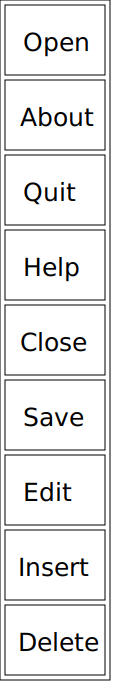

In [2]:
# Task instance
seed_layout =    ['Open', 'About','Quit','Help','Close','Save','Edit','Insert','Delete'] # initial layout
e_weights = {'Quit':0.5,'About':0.4,'Open':0.2,'Save':0.2,'Close':0.1,'Help':0.05,'Edit':0.1,'Insert':0.2,'Delete':0.2} # weights or 'importance' of elements

# Call the optimizer 
winner, winner_score = optimize(10000, random_search, seed_layout, 1, linear_ST, e_weights)

# Show result
print "Objective value (expected selection time):", winner_score
SVGlayout = render.SVGlayout(winner,1)
SVG(SVGlayout.inSVG)

### Reflection

Optimizing an interface is easy! Only a few lines were needed to capture some basic concepts. However, this was toy case. Why? Because our objective function was essentially about minimizing the distance of important elements to top. This problem could have been solved simply by ordering the items in decreasing order of importance! The problem would be harder if we did not ignore some other important design considerations, such as grouping of elements. Also, our solver was incredibly wasteful. This did not become an obstacle only because the size of the problem was small. Before moving on, let us [recap the basic concepts in the light of this example.](imgs/summary.png)

# 4. Basic concepts: Revisited

------------------

To attack more interesting problems, we need to revisit the basic concepts:

<img src="imgs/overview.png" width="80%">

### Search space

*Search space* is a representation, in code, of the feasible set for a search algorithm. [Some representations are illustrated here](imgs/representations.png). The choice of representation affects:
* availability of sovers; for example, the formulation of the concept of search neighborhood, which is exploited in local search methods
* computational efficiency
* ease of extension.

In the following, we use a *list* representation of layouts, that has its own pros and cons.

### Objective function

As said, **an objective function** maps a design candidate $x \in \mathbf{X}$ to a real-valued predictor:
$f: \mathbf{X} \rightarrow \mathbb{R}$.
To be relevant for interaction design, this function should quantify an aspect like usability, enjoyability, ergonomics, or errors. Several objectives may need to be combined for reasonable results ([example: web layout design; Todi et al. DIS 2016](imgs/multi-objective.png)).

Several models and heuristics are available to this end. This table shows 11 examples spanning task, cognitive, motor, and aesthetic aspects:

| Model | Example objective |  Application ref.  |
|----------|------|-------|
| Fitts' law  |  Minimize finger travel times | Zhai et al. UIST 2000 |
| Search-Decide-Point | Minimize visual search and selection time in menus  | Bailly et al. UIST 2013 |
| Coherence  |  Ensure related items are close to each other | Bailly et al. UIST 2013 |
| Familiarity |  Ensure spatial resemblance with a prior design | Dunlop et al. CHI 2013 |
| Keystroke-level model | Minimize task completion time for a sequential user task | Sarcar et al. IxAP 2016 |
| Active vision | Minimize visual search time when items are colored | Todi et al. DIS 2016 |
| Rosenholtz clutter model | Minimize visual clutter, maximize saliency | Rosenholtz et al. 2011 |
| Color harmony theory | Ensure harmonious color sets | Todi et al. DIS 2016 |
| Motor complexity theory | Minimize complexity of gesture sets | Sridhar et al. CHI 2015 |
| Ergonomics | Minimize shoulder stress | Bachynskyi et al. TOCHI 2015 |
| Internal clock model | Keep temporal task performance at desirable level | Lee et al. CHI 2016 |

**Subjective goals and preferences** can be dealt with by two main means: (1) by calibrating weights manually to correspond to some distribution of preferences, be they designers' or users'; (2) using machine learning to parametrize models to best correspond with individual priorities expressed in data. 

The choice of modeling formalism affects two critical goals:
1. **Predictive validity**: Prediction of desired outcomes in interaction 
2. **Computational efficiency**:  Minimum time to evaluate a design for a chosen solver.

#### Some modeling formalisms

**Heuristics** are rules of thumb used in design,  such as 'white space should be minimized'.  Since most heuristics are 'weak' (carry little information), multiple are needed. This leads to the problem of **conflict resolution**: how to weigh the contribution of one heuristic against another. Another issue of heuristics is their questionable validity. (Note: not to be confused with heuristic optimization methods.)

**Metrics** are expressed as a real-valued functions that capture some feature of a design and link it to predictions of outcomes to users. Example: Overplotting metrics in the design of information visualizations.

**Regression** offers a more expressive yet quickly computable mathematical form of cost functions:
$y = f (\mathbf{x}, \mathbf{\beta} ) + \epsilon$ . 

**Simulator-based models** are step-wise executed functions $M$ that map the model parameters $\theta$ to data. In HCI, the parameters $\theta$ capture both parameters of the user and those of the task or context. Simulators are **generative models** that predict not only the outcomes of interaction but intermediate steps, or the process of interaction. A simulator may address multiple design objectives in a coherent manner that require less weight-tuning. However, they are non-linear and significantly more expensive to execute, ruling out exact methods (e.g, integer programming).

In addition, there is a vast number of machine learning of different types available.

### Task instance

*Task instance* refers to task-specific input values to the design task and objective function, such as:
* How many or which elements to place and their properties (sizes, colors etc) 
* Relative importance of given design objectives (e.g,. is usability more critical than security?)
* Inputs expressing properties of targeted user groups, such as goals, capabilities, and interaction styles of users (e.g., what do they want to achieve with the interface?)
* Constraints of the interface (e.g., screen resolution, input method).

The task instance is specified by designer or inferred from data.

### Optimization method

Modern methods in combinatorial optimization can be divided into two main classes. An overview of [optimization methods in engineering optimization](imgs/optimizationmethods.png) is offered in Rao 2009:
1. **Black-box or heuristic methods** do not necessitate assumptions about  the objective function, but rather consider it as a black-box -- like an oracle -- that tells them the objective value of a given candidate it has generated.  
2. **Exact methods** such as integer programming offer mathematical guarantees for solutions but insist on analysis of the objective function for revealing simplifications and links to known tasks in the optimization literature. Integer programming is covered in the other part of the day.

<p>
<div class="alert alert-block alert-success"> 
<h3>Quiz: What have you learned?</h3> 
<br>
Take this [fun optimization quiz](https://goo.gl/IiMhIw) to test your knowledge!</div>
</p>

# 5. Toolbar design

---------------

We can finally turn to the design of more interesting interactive layouts. **Toolbars**, widely used in desktop and web applications, are essentially **grid menus** (typically with an elongated shape). To design a toolbar, ordering is not enough. One needs to consider how to ensure that related items are close to each other.

| New aspect | Content  |
|----------|------|
| Design objectives | Minimum selection time; **Your objective function** |
| Task instance | 12 elements in a productivity app |

<img src="imgs/toolbar.png" width="70%">

<p>
<div class="alert alert-block alert-success"> 
<h3>Exercise 2: Implement an objective function for element-grouping.</h3> 
<br>
Implement an objective function for grouping. It should try to keep *related items close to each other*. **Tip:** Association value between Your function can utilize *distance* function defined in the earlier cell. Call syntax: 'distance(columns, i,j)' </div>
</p>

Note: The random search algorithm must work before starting on this one.

Objective value: 2.63550007197


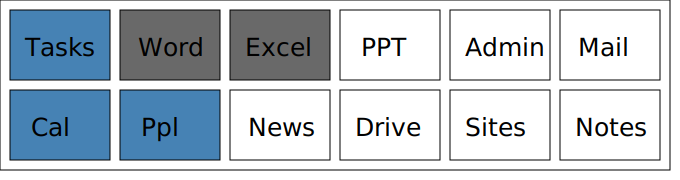

In [3]:
# A new objective function that considers two objectives: selection time and YOUR function
def ST_and_myO (layout, columns, o_inputs):
    return linear_ST (layout,columns,o_inputs[0:]) + 0.5 * myObjective (layout,columns,o_inputs[1:])

def myObjective (layout, columns, o_inputs):
    ov = 0.0
    for i in range(0, len(layout)):
        for j in range(i+1, len(layout)):
            association = max(0,o_inputs[0].get(layout[i]+layout[j]), o_inputs[0].get(layout[j] + layout[i]))
            # TASK: ADD YOUR OBJECTIVE FUNCTION HERE
            ov = 0 
    return ov

# Task instance
seed_layout = ['Tasks','Word','Excel','PPT','Admin','Mail','Cal','Ppl','News','Drive','Sites','Notes']
e_weights = {'Tasks':0.1,'Word':0.2,'Excel':0.15,'PPT':0.2,'Admin':0.05,'Mail':0.5,'Cal':0.4,'Ppl':0.4,'News':0.4,'Drive':0.2,'Sites':0.01, 'Notes':0.05}
associations = {'WordExcel':0.5,'WordPPT':0.5,'MailCal':0.3,'PplCal':0.3,'TasksCal':0.2,'NotesTasks': 0.3}
columns = 6

# Optimization
winner, winner_score = optimize(30000, random_search, seed_layout, columns, ST_and_myO, e_weights, associations)

# Results
print "Objective value:", winner_score
SVGlayout = render.SVGlayout(winner,columns,10,associations)
SVG(SVGlayout.inSVG)

## Simulated annealing

Results obtained thus far have been reasonable, because the problems have been small. To attack larger problems efficiently, and to introduce first concepts of heuristic methods, we turn to a classic: **simulated annealing**
* [Main idea in three diagrams](imgs/sa.jpg)
* [The annealing process: Animation](imgs/simulated-annealing.gif)
* [Pseudo-code](imgs/sa-pseudocode.png) 

We run the previous exercise using simulated annealing, observing that (on average) better objective value is obtained with the same computation budget. 

### Approach overview

**Local search** relies on a definition of a **neighborhood** of a given design. For example, the neighboring layouts of a keyboard layouts are those that can be constructed by swapping a pair of letters. Starting from an initial configuration, local search proceeds by chosing a neighboring configuration with an objective value that is at least as good as the current one. These choices could be, for example, greedy or randomized.

**Simulated Annealing** exploits local and random search in a exploration/exploitation scheme. A neighboring configuration is not only chosen when it yields to a better objective value but also with a certain probability when it is worse. However, this probability decreases with the extent of the detoriation of the objective value (temperature). 

<p>
<div class="alert alert-block alert-success"> 
<h3>Exercise 3: Define a 'neighboring design' for simulated annealing</h3> 
<br>
To use SA, need to add a function that allows the simulated annealer to explore the *neighborhood* of a current design. While there are many possibilities to construct a neighborhood. Your task is to define one. Bonus: Define control parameter 'n' for distance in the neighborhood.</div>
</p>

Objective value: 2.63550007197


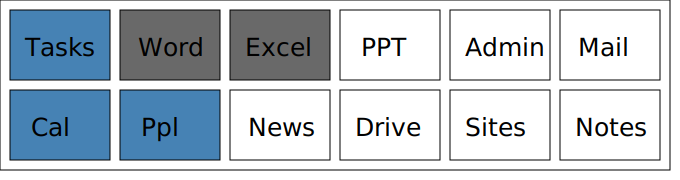

In [4]:
# Returns a neighbor of a layout (list); 
# has a parameter 'n' to control distance in the neighborhood (optional) 
def neighbor(layout, n=1):
    # TASK: INSERT YOUR FUNCTION HERE
    return layout

# Solver: Simulated annealing using exponential cooling schedule
def anneal(k_max, *args):
    s = args[0] # solution seed
    columns = args[1] 
    obj_f = args[2]
    o_inputs = args[3:]
    s_ov = obj_f(s, columns, o_inputs)
    T_min, T_initial, alpha = 0.0000001, 10000, 0.991 # Hyperparameters 
    converged = False
    
    for k in range (0, k_max):
        T = max(T_min, T_initial * math.pow(alpha,k)) # exponential cooling schedule
        s_new = neighbor(s[:], args[-1])
        s_new_ov = obj_f(s_new, columns, o_inputs)

        delta = s_new_ov - s_ov
        if delta < 0: # accept the neighbor if it is better 
            s = s_new[:]
            s_ov = s_new_ov
        elif random.random() < math.exp(-delta/T): # if not, decide according to the Metropolis rule
            s = s_new[:]
            s_ov = s_new_ov
    return s, s_ov

# Task instance (same as above)
seed_layout = ['Tasks','Word','Excel','PPT','Admin','Mail','Cal','Ppl','News','Drive','Sites','Notes']
e_weights = {'Tasks':0.1,'Word':0.2,'Excel':0.15,'PPT':0.2,'Admin':0.05,'Mail':0.5,'Cal':0.4,'Ppl':0.4,'News':0.4,'Drive':0.2,'Sites':0.01, 'Notes':0.05}
associations = {'WordExcel':0.5,'WordPPT':0.5,'MailCal':0.3,'PplCal':0.3,'TasksCal':0.2,'NotesTasks': 0.3}
columns = 6

# Optimization
winner, winner_score = optimize(10000, anneal, seed_layout, columns, ST_and_myO, e_weights, associations, 1)

# Present results
print "Objective value:", winner_score
SVGlayout = render.SVGlayout(winner,columns,10,associations)
SVG(SVGlayout.inSVG)

# 6. Dialogue design
----------

**Dialogues and forms** are similar to grid menus, with more constraints added to the relative placing of elements. We can model that in the task instance without changes to our objective function. Here, *n* elements must be placed on *n* slots, such that related items (e.g., label 'Password' should be next to its text entry field) are close to each other. Relative order of elements can be defined (e.g., 'OK' must occur only after manipulating some other field).

| New aspect | Content  |
|----------|------|
| Task instance | Labels and entry fields, OK and Cancel button; Associations among element-pairs |

We here consider a simple type with only 8 elements. Our case imitates that of a regular **login dialogue** such as this:
<img src="imgs/login-dialogue.png" width=50%>


Objective value: 1.01059694133


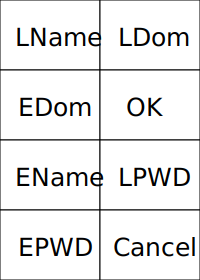

In [7]:
seed_layout = ['LName','LDom','EDom','OK','EName','LPWD','EPWD','Cancel']
e_weights = {'LName':0.6,'EName':0.5,'LPWD':0.3,'EPWD':0.2,'LDom':0.1,'EDom':0.05,'OK':0.03,'Cancel':0.02}
associations = {'LNameEName':1.0,'LPWDEPWD':1.0,'LDomEDom':1.0,'OKCancel':1.0}
columns = 2

# Optimization
winner, winner_score = optimize(10000, anneal, seed_layout, columns, ST_and_myO, e_weights, associations, 2)

# Present results
print "Objective value:", winner_score
SVGlayout = render.SVGlayout(winner,columns,0,associations)
SVG(SVGlayout.inSVG)

<p>
<div class="alert alert-block alert-success"> 
<h3>In-class discussion.</h3> 
<br>
This solution was heavily constrained by the input data, which dictated how elements should go next to each other. It would be possible to build a solver that exploits this, e.g. by placing elements in order of importance and in groups defined by pairwise associations. What might be some other design problems that are heavily constrained by nature?
</div>
</p>


# 7. Web layouts
----------

The design of a **web layouts** (or, any graphical widget layout) is an order of magnitude harder problem. First, we start combining requirements we saw for menu (= some elements more important to be found quickly than others) and for dialogues (= some elements must be manipulated in some order). The canvas is larger, providing way more options on how to place items. There may also be empty slots (white space). Many control panels, dialogues, and control panels tasks are similar ([example](imgs/cockpit.png)).

We also must reconsider our objective function. For example, it is well known that, or reasons of visual appeal, the alignment of element groups is important. To that end, we have implemented a simplified version of a **grid alignment function**:
* [Miniukovich, A. (2015). Computational Inteface Aesthetics. Proc. CHI'15](https://www.researchgate.net/profile/Aliaksei_Miniukovich/publication/300726008_Computation_of_Interface_Aesthetics/links/57d7e0b108ae5f03b49812c7.pdf)

Our revised design task is:

| New aspect | Content  |
|----------|------|
| Objective function | Selection time, Incoherence, **Misalignment** |
| Task instance | 36 elements; groups and associations |

As our task instance, we consider a design like the [CHI2017 homepage](imgs/chi-homepage.png). To desing a task instance, we annotate different element types of the page with [prefixes as follows](imgs/chi-homepage-annotated.png).

6.48373474959


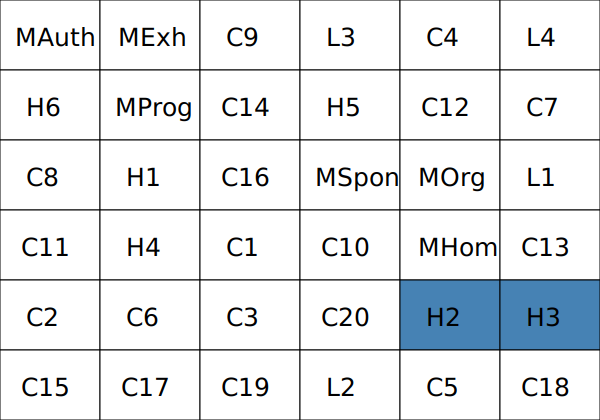

In [6]:
# A tri-objective function: selection time (ST) and incoherence (I) and misalignment (M)
def ST_and_myO_and_M (layout, columns, o_inputs):
    ST = linear_ST(layout,columns,o_inputs[0:])
    myO = myObjective(layout,columns,o_inputs[1:])
    M = misalignment(layout,columns,o_inputs[1:])
    return ST + 0.5 * myO + 0.5 * M

# Returns a misalignment score M
# - Inspired by grid quality metrics (Miniukovich et al. CHI'15)
# - An important difference is that the number of grid lines is not minimized
def misalignment (layout, columns, o_inputs):
    M = len(o_inputs[0].keys())+1 
    for i in range(0, len(layout)):
        verticals = 0.0
        horizontals = 0.0
        related = 0.0
        for j in range(0, len(layout)):
            if i==j: 
                next
            association = max(0,o_inputs[0].get(layout[i]+layout[j]), o_inputs[0].get(layout[j] + layout[i]))
            if association == 0:
                next 
            else:
                related += 1
                verticals += vertically_aligned(columns, i,j)
                horizontals += horizontally_aligned(columns, i,j)
                #print i,j,verticals,horizontals
        if related > 0:
            M -= 1.0 * (max(verticals/related, horizontals/related) - min(verticals/related, horizontals/related))
    return M

# Helper functions for the new misalignment value
# Returns 1 if two elements are vertically aligned
def vertically_aligned (columns, i, j):
    #print "vert", i,j, abs(j-i), abs(j-i) % columns
    if (abs(j-i) % columns) == 0:
        return 1.0
    else:
        return 0.0

# returns 1 if two elements are horizontally aligned
def horizontally_aligned (columns, i, j):
    #print "hor", i,j, abs(j-i), int(j/columns), int(i/columns)
    if (abs(j-i) <= columns) and (int(j/columns) == int(i/columns)):
        return 1.0
    else:
        return 0.0

# Task instance
# We compose the task in several pieces to make its structure clearer
menu = ['MExh','MOrg','MHom','MAuth','MProg','MSpon']
menu_weights = {'MHom':0.5}
menu_associations = {'MHomMAuth':0.5,'MAuthMProg':0.5,'MProgMSpon':0.5,'MSponMExh':0.5,'MExhMOrg':0.5}

header = ['H3','H4','H5','H6','H1','H2']
header_associations = {'H1H2':0.5,'H2H3':0.5,'H3H4':0.5,'H4H5':0.5,'H5H6':0.5}
header_weights = {'H1':0.3}

links = ['L1','L2','L3','L4']
links_associations = {'L1L2':0.5, 'L2L3':0.5, 'L3L4': 0.5}
links_weights = {'L1': 0.1}

content = ['C1','C2','C3','C4','C5','C6','C7','C8','C9','C10','C11','C12','C13','C14','C15','C16','C17','C18','C19','C20']

# We here put these parts together to a single task instance
seed_layout = menu + header + links + content
random.shuffle(seed_layout)
weights = menu_weights.copy() 
weights.update(header_weights)
weights.update(links_weights)
associations = menu_associations.copy()
associations.update(header_associations)
associations.update(links_associations)
columns = 6

# Optimization
winner, winner_score = optimize(100, anneal, seed_layout, columns, ST_and_myO_and_M, weights, associations,1)

# Present results
print winner_score
SVGlayout = render.SVGlayout(winner,columns,0,associations)
SVG(SVGlayout.inSVG)

### Reflection 

As you see, obtaining a good solution is very hard, even after more computation. [Our result after 100K iterations using simulated annealing is still not very good.](imgs/result-100000.png)

# 8. Heuristic and metaheuristic methods
---------

There are several possibilities to improve! Here are some: (1) One could try using more clever heuristics. They might boost performance, but which one to use? (2) The code could also be optimized (e.g., parallelization, precomputed lookup tables for objective function, ...). This might bring x10 or even x100 speed-ups. (3) One could also use domain knowledge to rewrite the optimizer, such as exploiting the groups of associated elements as units. (4) How about reformulating the problem for exact methods, such as integer programming (see Anna's notebook)? (5) The hyperparameters of the method might be tuned. (6) We could look at diagnostics telling something about how the optimizer works and what the search landscape looks like. We here look at the first option (heuristics).

## Heuristic strategies

􏰀A heuristic is a technique that seeks good (near-optimal) solutions at a reasonable computational cost without guaranteeing optimality. Often heuristics are problem-specific and cannot be transfered from one problem to another. The essence of heuristic methods is search by *trial and error* (Glover 1986). Heuristic methods are practical for non-linear problems where analytical solutions might not be obtained, in theory or in practice.  

Key dimensions are: 

**Stochastic vs. deterministic:** Stochastic methods exploit randomness in choosing how to sample the design space. They offer an effective way to obtain solutions of good quality. However, a different solution might be found even if starting from the same seed. Deterministic methods end up with the same solution every time when starting from the same location.
* Random search with restarts (stochastic)
* Particle swarm optimization (stochastic)
* Hill-climbing (deterministic).

**Local vs. global**: Local methods search within some defined neighborhood of a solution. In other words, a solution can [communicate](imgs/communication.png) with other solutions. These methods can converge to a *local* optimum quickly. However, without additional capabilities, they may not find the global optimum. 

**Greedy:** divides the construction of a solution into multiple subsequent decisions that are solved locally before moving to the next one. These decisions are taken in a certain order and are not revoked later. A greedy algorithm would in each step choose the best available solution. Idea: Start with empty solution; iteratively add elements, each adding highest gain; stop when no more elements can be added. 

**Trajectory-based vs. population-based:** Trajectory-based algorithms investigate an agent (or sample point, or candidate solution) at a time. Its progress can be traced as the trace of changes to that solution as search evolves. Population-based methods, by contrast, maintain a larger number of candidate solutions and choose between them.
* Hill-climbing (trajectory-based)
* Genetic algorithms (population-based)

See also this [overview diagram](imgs/methods.png).

## Metaheuristics

Some (not all) heuristic methods can get easily 'trapped' in a local optimum. According to a loose definition, all heuristic methods are metaheuristic, too. According to a stricter definition, metaheuristics are optimization methods that modify their use of heuristic methods as optimization progresses: 

> "master strategy that guides and modifies other heuristics to produce solutions beyond those that are normally generated in a quest for local optimality" (Glover and Laguna 1997)

> “A metaheuristic is formally defined as an iterative generation process which guides a subordinate heuristic by combin- ing intelligently different concepts for ex- ploring and exploiting the search space, learning strategies are used to struc- ture information in order to find effici- ently near-optimal solutions.” (Osman and Laporte 1996).

Metaheuristics implement some tradeoff between local and global strategies, and they are therefore generally considered global optimization methods.

<img src="imgs/local-global.png" width="95%"></img>

### Some general strategies

**Intensification and diversification** (a.k.a. exploitation and exploration): [Diversification](imgs/diversification.png) means generating diverse solutions to explore the global search space, and [intensification](imgs/intensification.png) focusing on a local region to find the best solution in that region. Controlling the balance between these strategies improves the rate of convergence. However, this never guarantees finding the global optimum. Simulated annealing belongs includes hyper parameters (temperature) to control how to diversify/intensify search with time. 

**Memory:** One common strategy is to keep a memory of good or bad previously seen solutions. [Tabu search](https://en.wikipedia.org/wiki/Tabu_search) is a classic example ([illustration](imgs/tabu.png)).

**Construction:** Instead of sampling full solutions, one can try to combine element-level ideas from previously visited solutions. A method can try to build a proxy model of the domain to 'guess' where previously unseen good solutions might be (e.g., ant colonies implement a pheromone function). ([Example ACO](https://www.youtube.com/watch?v=0NtB7PQxizw).)

**Biology-inspired meta-heuristics** such as *genetic algorithms* and *ant colony optimization* borrow ideas from nature.

<p>
<div class="alert alert-block alert-success"> 
<h3>Exercise 4: Improve the web layout optimizer with a metaheuristics approach.</h3> 
<br>
Design, implement, and test at least one metaheuristic method. Report how much it improves your objective value. For competition: The group that obtains the lowest objective value in fixed time wins. Ensure your code outputs the objective value when it finds a new incumbent. 
</div>
</p>

A visual summary of [some often used metaheuristics in Scholarpedia](http://www.scholarpedia.org/article/Metaheuristic_Optimization). 

### Hyperparameter tuning
A general problem with metaheuristics is the selection of hyperparameters (e.g., temperature cooling schedule in simulated annealing). These can be set manually, or one can try to search the best parameters (often by using grid search) for the task at hand.  

# 9. Advanced topics
----------
Real-world problems are often characterized by
* Existence of some prior knowledge about good designs (think: your favorite app)
* Uncertain or inexact data (think: a human as the source of inputs)
* Problems are high-dimensional (think: a web layout or office tool)
* Changing conditions of use (think: different user groups and needs, changing contents)
* Expensive computations (think: a machine learning model to parametrize your objective function)
* Changing criteria for good design (think: a designer ideating)

## Reduced basis technique

If we know that some *n* good designs exist, we can use this information in many ways. (1) We can seed the optimizer with this information. (2) We could also try to solve a simpler version of the problem where we try to find a linear combination of the existing designs:
$$ X = c_1 X_1 + c_2 X_2 + \cdots + c_n X_n $$
where *X_n* are design vectors representing the good desigsn and *c_n* are unknown constants. 

## Sensitivity analysis

An optimal design is a *particular* set of design choices. However, in some cases we would like to know if it is specific to the task instance. How much would a change in the input parameters 'perturb' the best design? In other words, how sensitive is it to the underlying task? Consider the Qwerty keyboard: It is an acceptable design for English, but if we assume a different user population, how much would it change? 

## Robust optimization

Robust optimization takes a more proactive approach to optimization. We generate a series of solutions and improve them to make the progressively less sensitive to task instances. We call the set of task instances a **scenario set**. The most robust design is the one that achieves the best objective value across the whole set. 

## Multi-objective optimization

In real-world design problems, objectives often conflict with each other. 
A perfect multi-objective solution that is the best in terms of all objectives is mostly unattainable.

#### Pareto optimality

We must first revisit our what 'optimality' means in the case of multi-objective optimization. We need a new concept: A **pareto-optimal design** is one which cannot be changed to make one objective better without making at least one other objective worse off. [Pareto frontier](imgs/pareto.jpg) is the set of all pareto optimal designs. Finding Pareto frontiers is useful for making informed choices in design, focusing on the particular parameters that differentiate designs (as opposed to all of them).

#### Multi-objective function: Strategies

Thus far, we have used the **weighted sum approach**, which collapses the multiple objectives into a single function by the use of weights. This has known limitations, such as fragility to weights. In addition, selecting a weight is a problem. Trying to fix a problem by changing a weight can cause unwanted [side effects](http://i.imgur.com/x501fi0.gifv). 

Like with heuristics, the choice of another function is case-specific. Some strategies that one can try ([see also this paper](http://web.cse.ohio-state.edu/~parent.1/classes/788/Au10/OptimizationPapers/MultiObjective/journal_survey.pdf)):
* Inverted sum: as opposed to maximizing goodness, we want to minimize 'undesirability' (inverse of goodness value).
* Normalization: Makes objectives less sensitive to weight selection.
* Function transformations: For example, a logarithmic transformation de-emphasises one end of the variable.
* The weighted min-max method (the weighted Tchebycheff): "ensure that a minimum is reached, maximize after that"
* Bounded objective: We place a maximum and minimum level for each objective, which leads to prioritizing the most important function first. 
* Lexicographic method: Rank objectives and optimize them one at a time by starting from the most important objective. 
* Goal programming: Designer sets goals for each objective that should be ideally obtained. The best design is closest to those references.
* Goal attainment method: Rank objectives, place goals to them, solve them one at a time in the ranked order, moving on to next objective after attaining the goal.

<p>
<div class="alert alert-block alert-success"> 
<h3>Exercise 5: Pareto frontier.</h3> 
<br>
Implement a method to print all pareto-optimal designs in some easily solved problem. Tip: You can first compute objective values for a set of feasible designs, and then determine the Pareto frontier.
</div>
</p>

<p>
<div class="alert alert-block alert-success"> 
<h3>Exercise 6: Multi-objective approach.</h3> 
<br>
Study, design, implement, and test one multi-objective approach. 
</div>
</p>

## Interactive optimization

The standard "fire and forget" paradigm of optimization methods is irreconcilable with design practice: A designer cannot be asked to provide all inputs to an optimizer within a decimal point and come back later for an answer. However, a considerable amount of information is needed to design anything. Which aspects can be automated and which should be left to the designer?

[Interactive design tools](imgs/interactive-optimization.png) automate some aspects of design work but leave others to the designer. This introduces a tradeoff between the designer's and the optimizer's objectives. The **full-control** concept (MenuOptimizer) requires objectives and constraints to be specified upon any change in a designer's task. A **minimum-effort optimization** approach tries to infer some the design task and then reacts, e.g. by suggesting redesigns.
 
Some dimensions of interactive optimization methods:
* **Control before, during, or after optimization**
* **Proactive vs. reactive optimization**: Should the optimizer try to encourage or even override the designer to improve their (assumed) quality?
* **Locus of control:** objectives, constraints, examples?


# 10. Discussion

---------------------

This unit has introduced some basic concepts of model-based combinatorial optimization using a plain vanilla black-box optimizer demonstrated in layout design problems. 

Combinatorial optimization offers a powerful tool for interface design. 
Applications in realistic problems depend on success in: 1) formal definition of a design task, 2) encoding of meaningful design objectives and knowledge in the objective function, 3) choosing and tuning an efficient solver. After this, the algorithm can be used to support the creative and problem-solving activities of a designer. Different task instances can be solved with the approach once set up.

The upside of this approach is that almost any problem can be attacked. The downside is that no guarantees can be given to the solution. The selection of a method is 'black art'. 

To scale up, at least the following challenges stand out:
* Acquiring meaningful input data empirically or by using machine learning models
* Calibrating parameters of objective functions (e.g., empirically)
* Justifying the objective functions and design tasks against some empirical data or literature
* Constructing an efficient solver
* Developing a tool for designers to work with the optimization system
* Carrying out diagnostics and visualizations to understand the results
* Choosing and tuning a suitable multi-objective function
* Carrying out critical empirical evaluation of optimized interfaces.

### Final words

> "How far can we push the envelope in modeling human behavior? Although the work described here has been successful with basic sensory-motor models and is expanding to cognitive aspects, there is still a long way to go to address the physical, social, and cultural factors of interaction that are key to emerging topics like AI, the Internet of Things, and social media. Finally, which aspects of design should be automated and which should be left to the designer? Carelessly designed tools will lead to deskilling and avoidance of responsibility, thereby undermining the potential benefits of optimization. If such problems are solved, the wider implications of this approach are intriguing. (Oulasvirta, IEEE Computer 2017)

<p>
<div class="alert alert-block alert-success"> 
<h3>Reflection.</h3> 
<br>
What were the most surprising, hardest, or exciting things you learned?</div>
</p>

## Selected further readings

* Karrenbauer, A., Oulasvirta, A. (2014). [Keyboard optimization with integer programming](http://resources.mpi-inf.mpg.de/keyboardoptimization/). Proc. UIST'14. 
* Oulasvirta, A. (2017). [User Interface Design with Combinatorial Optimization](http://users.comnet.aalto.fi/oulasvir/pubs/UIdesign_with_combinatorial_optimization_IEEEComputer_2017_Oulasvirta.pdf), IEEE Computer 50 (1).
* Bailly, G. et al. (2013). [MenuOptimizer:  Interactive Optimization of Menu Systems](https://www.gillesbailly.fr/publis/BAILLY_MenuOptimizer.pdf), Proc. UIST 2013. 
* Todi, K. et al. [Sketchplorer: Sketch and explore with an optimizer](http://www.kashyaptodi.com/sketchplore/), Proc. DIS'16. 
* Micallef, L. et al. (2017). [Towards perceptual optimization of the visual design of scatterplots](http://ieeexplore.ieee.org/document/7864468/), IEEE TGCV
* Feit, A., Oulasvirta, A. (2105). [Exercises in assignment problems in keyboard design](https://www.slideshare.net/oulasvir/modelbased-user-interface-optimization-part-ii-letter-assignment-at-sicsa-summer-school-on-computational-interaction-2015?qid=4320d34c-8c76-42c8-9cd3-69b2260dbc3a&v=&b=&from_search=2), Lecture notes from 1st Computational Interaction Summer School 2015, Glasgow